In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image 

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#installing keras
!pip install -q keras
import keras

In [ ]:
#unzipping our folder of images containing driver behaviour
! unzip '/content/drive/MyDrive/ME781_Dataset_DriverBehaviour.zip'

Archive:  /content/drive/MyDrive/ME781_Dataset_DriverBehaviour.zip
replace Revitsone-5classes/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#adding file paths for base folders and sub_folders
BASE_DIR = '/content/__MACOSX/Revitsone-5classes/'
images_dir = BASE_DIR + 'Revitsone-5classes/'
other_activities = images_dir + 'other_activities/'
safe_driving = images_dir + 'safe_driving/'
talking_phone = images_dir + 'talking_phone/'
texting_phone = images_dir + 'texting_phone/'
turning = images_dir + 'turning/'

files_in_other_activities = sorted(os.listdir(other_activities))
files_in_safe_driving = sorted(os.listdir(safe_driving))
files_in_talking_phone = sorted(os.listdir(talking_phone))
files_in_texting_phone = sorted(os.listdir(texting_phone))
files_in_turning = sorted(os.listdir(turning))

#creating list of images in each sub-folder with the activity_type
other_activity_images=['other_activities/' + i for i in files_in_other_activities]
safe_driving_images=['safe_driving/' + i for i in files_in_safe_driving]
talking_phone_images=['talking_phone/' + i for i in files_in_talking_phone]
texting_phone_images=['texting_phone/' + i for i in files_in_texting_phone]
turning_images=['turning/' + i for i in files_in_turning]

#creating a unified list of all the images from all the sub-folders
images = other_activity_images + safe_driving_images + talking_phone_images + texting_phone_images + turning_images

In [ ]:
#creating an empty dataframe to add images 
df = pd.DataFrame()
df['column'] = [str(x) for x in images]

In [ ]:
df.head()

,column
0,other_activities/._2019-04-2416-05-13.png
1,other_activities/._2019-04-2416-06-20.png
2,other_activities/._2019-04-2416-06-37.png
3,other_activities/._2019-04-2416-06-59.png
4,other_activities/._2019-04-2416-07-58.png


In [ ]:
#splitting the unified column into activity and images using str.split() at '/'
df[['activity_type', 'image_id']] = df['column'].str.split('/', expand=True)

In [ ]:
df = df.drop(columns='column', axis=0)

In [ ]:
df.head()

,activity_type,image_id
0,other_activities,._2019-04-2416-05-13.png
1,other_activities,._2019-04-2416-06-20.png
2,other_activities,._2019-04-2416-06-37.png
3,other_activities,._2019-04-2416-06-59.png
4,other_activities,._2019-04-2416-07-58.png


In [ ]:
for i in range(len(df['image_id'])):
    df['image_id'][i] = df['image_id'][i].strip("._")

In [ ]:
#defining a function that edits the path of the image to direct it to the correct directory
def edit_path_img(x):
    return path + x

In [ ]:
#appending paths to the image strings in the dataset column
df2=(df.loc[df['activity_type']=='other_activities'])
path='/content/Revitsone-5classes/other_activities/'
df2["image_id"] = df2["image_id"].apply(edit_path_img)
display(df2)

df3=(df.loc[df['activity_type']=='safe_driving'])
path='/content/Revitsone-5classes/safe_driving/'
df3["image_id"] = df3["image_id"].apply(edit_path_img)
display(df3)

df4=(df.loc[df['activity_type']=='talking_phone'])
path='/content/Revitsone-5classes/talking_phone/'
df4["image_id"] = df4["image_id"].apply(edit_path_img)
display(df4)

df5=(df.loc[df['activity_type']=='texting_phone'])
path='/content/Revitsone-5classes/texting_phone/'
df5["image_id"] = df5["image_id"].apply(edit_path_img)
display(df5)

df6=(df.loc[df['activity_type']=='turning'])
path='/content/Revitsone-5classes/turning/'
df6["image_id"] = df6["image_id"].apply(edit_path_img)
display(df6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,activity_type,image_id
0,other_activities,/content/Revitsone-5classes/other_activities/2...
1,other_activities,/content/Revitsone-5classes/other_activities/2...
2,other_activities,/content/Revitsone-5classes/other_activities/2...
3,other_activities,/content/Revitsone-5classes/other_activities/2...
4,other_activities,/content/Revitsone-5classes/other_activities/2...
...,...,...
2123,other_activities,/content/Revitsone-5classes/other_activities/i...
2124,other_activities,/content/Revitsone-5classes/other_activities/i...
2125,other_activities,/content/Revitsone-5classes/other_activities/i...
2126,other_activities,/content/Revitsone-5classes/other_activities/i...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,activity_type,image_id
2128,safe_driving,/content/Revitsone-5classes/safe_driving/2019-...
2129,safe_driving,/content/Revitsone-5classes/safe_driving/2019-...
2130,safe_driving,/content/Revitsone-5classes/safe_driving/2019-...
2131,safe_driving,/content/Revitsone-5classes/safe_driving/2019-...
2132,safe_driving,/content/Revitsone-5classes/safe_driving/2019-...
...,...,...
4326,safe_driving,/content/Revitsone-5classes/safe_driving/img_9...
4327,safe_driving,/content/Revitsone-5classes/safe_driving/img_9...
4328,safe_driving,/content/Revitsone-5classes/safe_driving/img_9...
4329,safe_driving,/content/Revitsone-5classes/safe_driving/img_9...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,activity_type,image_id
4331,talking_phone,/content/Revitsone-5classes/talking_phone/2019...
4332,talking_phone,/content/Revitsone-5classes/talking_phone/2019...
4333,talking_phone,/content/Revitsone-5classes/talking_phone/2019...
4334,talking_phone,/content/Revitsone-5classes/talking_phone/2019...
4335,talking_phone,/content/Revitsone-5classes/talking_phone/2019...
...,...,...
6495,talking_phone,/content/Revitsone-5classes/talking_phone/img_...
6496,talking_phone,/content/Revitsone-5classes/talking_phone/img_...
6497,talking_phone,/content/Revitsone-5classes/talking_phone/img_...
6498,talking_phone,/content/Revitsone-5classes/talking_phone/img_...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,activity_type,image_id
6500,texting_phone,/content/Revitsone-5classes/texting_phone/2019...
6501,texting_phone,/content/Revitsone-5classes/texting_phone/2019...
6502,texting_phone,/content/Revitsone-5classes/texting_phone/2019...
6503,texting_phone,/content/Revitsone-5classes/texting_phone/2019...
6504,texting_phone,/content/Revitsone-5classes/texting_phone/2019...
...,...,...
8698,texting_phone,/content/Revitsone-5classes/texting_phone/img_...
8699,texting_phone,/content/Revitsone-5classes/texting_phone/img_...
8700,texting_phone,/content/Revitsone-5classes/texting_phone/img_...
8701,texting_phone,/content/Revitsone-5classes/texting_phone/img_...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,activity_type,image_id
8703,turning,/content/Revitsone-5classes/turning/2019-04-24...
8704,turning,/content/Revitsone-5classes/turning/2019-04-24...
8705,turning,/content/Revitsone-5classes/turning/2019-04-24...
8706,turning,/content/Revitsone-5classes/turning/2019-04-24...
8707,turning,/content/Revitsone-5classes/turning/2019-04-24...
...,...,...
10761,turning,/content/Revitsone-5classes/turning/img_99851.jpg
10762,turning,/content/Revitsone-5classes/turning/img_99915.jpg
10763,turning,/content/Revitsone-5classes/turning/img_99944.jpg
10764,turning,/content/Revitsone-5classes/turning/img_99976.jpg


In [ ]:
#concatenating the edited datasets into one final dataset that will be used for training
frames=[df2,df3,df4,df5,df6]
final_df=pd.concat(frames)
display(final_df)

,activity_type,image_id
0,other_activities,/content/Revitsone-5classes/other_activities/2...
1,other_activities,/content/Revitsone-5classes/other_activities/2...
2,other_activities,/content/Revitsone-5classes/other_activities/2...
3,other_activities,/content/Revitsone-5classes/other_activities/2...
4,other_activities,/content/Revitsone-5classes/other_activities/2...
...,...,...
10761,turning,/content/Revitsone-5classes/turning/img_99851.jpg
10762,turning,/content/Revitsone-5classes/turning/img_99915.jpg
10763,turning,/content/Revitsone-5classes/turning/img_99944.jpg
10764,turning,/content/Revitsone-5classes/turning/img_99976.jpg


In [ ]:
#no. of records and columns
print('Dataframe number of records = '+str(final_df.shape[0]))
print('Dataframe number of variables (including the class) = '+str(final_df.shape[1]))

Dataframe number of records = 10766
Dataframe number of variables (including the class) = 2


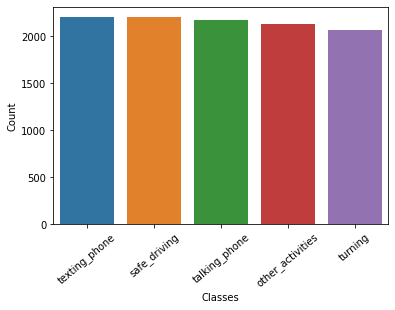

In [ ]:
#exploratory data analysis on the frequency count of various driver behaviour
counts = final_df['activity_type'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=40);

In [ ]:
#shuffling the data to get rid of any underlying order that may exist
final_df = final_df.sample(frac = 1) 

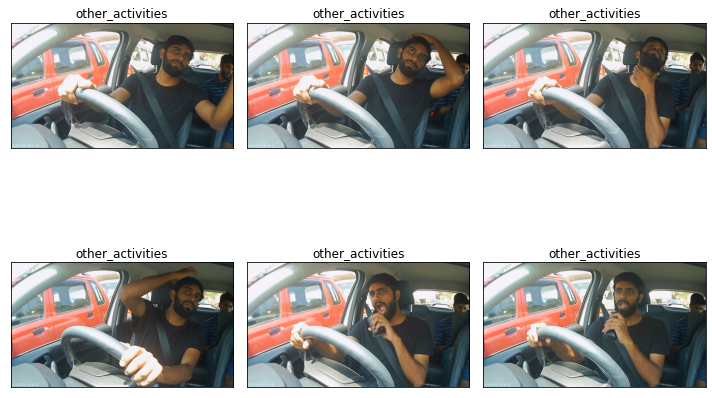

In [ ]:
#to observe a few samples from the dataset
datafig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(final_df.image_id[i]))
    ax.set_title(final_df.activity_type[i])
plt.tight_layout()
plt.show()

In [ ]:
#removing images that are corrupted and that create error during the training of the model
final_df = final_df[~final_df['image_id'].isin(['/content/Revitsone-5classes/other_activities/img_13541.jpg','/content/Revitsone-5classes/other_activities/img_79.jpg','/content/Revitsone-5classes/other_activities/img_7973.jpg','/content/Revitsone-5classes/turning/img_101434.jpg','/content/Revitsone-5classes/turning/img_62337.jpg','/content/Revitsone-5classes/other_activities/img_13318.jpg','/content/Revitsone-5classes/other_activities/img_4664.jpg','/content/Revitsone-5classes/turning/img_67523.jpg','/content/Revitsone-5classes/other_activities/img_13396.jpg','/content/Revitsone-5classes/turning/img_84605.jpg','/content/Revitsone-5classes/turning/img_8771.jpg','/content/Revitsone-5classes/turning/img_70552.jpg','/content/Revitsone-5classes/other_activities/img_22266.jpg','/content/Revitsone-5classes/other_activities/img_13625.jpg','/content/Revitsone-5classes/other_activities/img_20398.jpg'])]
from PIL import Image
for x in final_df['image_id']:
 im = Image.open(x) 

In [ ]:
#splitting the datset into training and testing counterparts
train_df, test_df = train_test_split(final_df, test_size=0.3)

In [ ]:
#preprocessing the images using preprocess_input for mobilenetv2 as imported previously
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
#generating validation splits for training epochs of the mobile net architecture on our dataset
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_id',
    y_col='activity_type',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=0
)

val_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_id',
    y_col='activity_type',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=0
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_id',
    y_col='activity_type',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 7525 validated image filenames belonging to 5 classes.
Found 7525 validated image filenames belonging to 5 classes.
Found 3226 validated image filenames belonging to 5 classes.


In [ ]:
#initializing the pretrained model of MobileNetV2 
pretrained_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
#initializing our model in form if keras Model as imported previously
inputs = pretrained_model.input
x = Dense(120, activation='relu')(pretrained_model.output)
x = Dense(120, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
#compiling our model using the adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#creating an early stopping condition on the basis of the validation accuracy achieved to prevent overfitting of the model
my_callbacks  = [EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, mode='auto')]

In [ ]:
#output of the history of the training of our model over max 25 epochs, but subject to the early stopping condition
history = model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=my_callbacks)

Epoch 1/25
236/236 [==============================] - 483s 2s/step - loss: 0.7538 - accuracy: 0.7103 - val_loss: 0.3997 - val_accuracy: 0.8494
Epoch 2/25
236/236 [==============================] - 429s 2s/step - loss: 0.3008 - accuracy: 0.8958 - val_loss: 0.2171 - val_accuracy: 0.9312
Epoch 3/25
236/236 [==============================] - 429s 2s/step - loss: 0.2018 - accuracy: 0.9308 - val_loss: 0.1762 - val_accuracy: 0.9426
Epoch 4/25
236/236 [==============================] - 427s 2s/step - loss: 0.1498 - accuracy: 0.9526 - val_loss: 0.1308 - val_accuracy: 0.9548
Epoch 5/25
236/236 [==============================] - 477s 2s/step - loss: 0.1136 - accuracy: 0.9613 - val_loss: 0.0845 - val_accuracy: 0.9725
Epoch 6/25
236/236 [==============================] - 423s 2s/step - loss: 0.0878 - accuracy: 0.9721 - val_loss: 0.0709 - val_accuracy: 0.9775
Epoch 7/25
236/236 [==============================] - 474s 2s/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0406 - val_accuracy: 0.9894

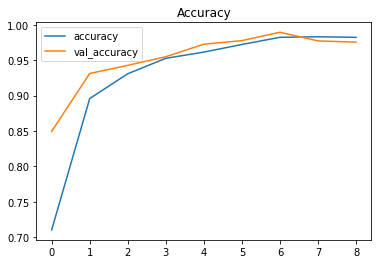

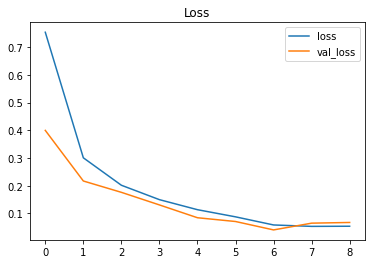

In [ ]:
#plotting the training and validation accuracy
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

#plotting the training and validation loss
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
#evaluating the testing loss and accuracy
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.19704
Test Accuracy: 93.71%


In [ ]:
#using our model to predict the labels for images in the testing datset
y_pred = model.predict(test_gen )
y_pred = np.argmax(y_pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
y_pred = [labels[k] for k in y_pred]

In [ ]:
#classification report on the basis of individual classes as well as the overall performance
y_test = list(test_df.activity_type)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

other_activities       0.95      0.86      0.90       636
    safe_driving       0.87      0.98      0.92       657
   talking_phone       0.99      0.91      0.95       622
   texting_phone       0.92      0.97      0.94       662
         turning       0.98      0.97      0.97       649

        accuracy                           0.94      3226
       macro avg       0.94      0.94      0.94      3226
    weighted avg       0.94      0.94      0.94      3226



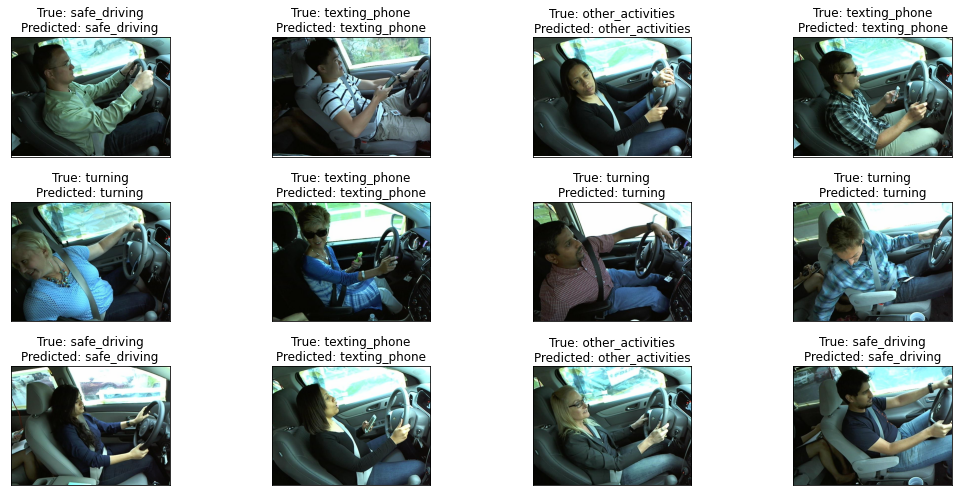

In [ ]:
#visualizing the predicted vs. actual labels given to our testing samples
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.image_id.iloc[i]))
    ax.set_title(f"True: {test_df.activity_type.iloc[i]}\nPredicted: {y_pred[i]}")
plt.tight_layout()
plt.show()